In [2]:

from highlight_text import fig_text
from mplsoccer import PyPizza, add_image, FontManager
#from mplsoccer.pitch import Pitch
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

link1 = 'https://fbref.com/en/matches/74010cc4/Manchester-City-Chelsea-May-29-2021-Champions-League'


In [4]:
url = (link1)

params = ['Sh',  'Press', 'Succ', 'Tkl', 'Int', 'Blocks', 'Touches','Cmp', 'Cmp%']

params_br = ['Chutes', 'Pressões', 'Pressões com sucesso', 'Desarmes', 'Interceptações', 'Bloqueios',   'Toques', 'Passes Completos', 'Passes Completos %']


time1 = pd.read_html(url)[3]
time1.columns = time1.columns.droplevel()
time1_def = pd.read_html(url)[6]
time1['Pressões com sucesso %'] = time1_def['Pressures']['Succ']

time2 = pd.read_html(url)[10]
time2.columns = time2.columns.droplevel()
time2_def = pd.read_html(url)[13]
time2['Pressões com sucesso %'] = time2_def['Pressures']['Succ']
#df = pd.read_html(url)[10]

todos_jogadores = time1[:-1].append(time2[:-1]).fillna(0)
todos_jogadores.index = todos_jogadores.Player
todos_jogadores = todos_jogadores.loc[:, params]
todos_jogadores.columns = params

todos_jogadores

,Sh,Press,Succ,Tkl,Int,Blocks,Touches,Cmp,Cmp%
Player,,,,,,,,,
Kevin De Bruyne,0,11,1,2,1,1,31,14,66.7
Gabriel Jesus,0,11,1,1,0,1,18,12,85.7
Raheem Sterling,3,5,0,1,0,1,29,12,75.0
Sergio Agüero,0,1,0,0,0,0,5,3,75.0
Riyad Mahrez,1,10,1,0,0,1,48,25,69.4
Phil Foden,3,22,4,0,0,0,56,35,79.5
Bernardo Silva,0,18,0,1,1,0,27,20,87.0
Fernandinho,0,4,0,0,0,2,26,21,91.3
İlkay Gündoğan,0,8,1,0,1,0,84,76,93.8


In [5]:
min_range = list(todos_jogadores.min())
max_range = list(todos_jogadores.max())

print(min_range, max_range)

# ------//------ #

values = list(todos_jogadores.loc["N'Golo Kanté"])
print(values)

# ------//------ #

URL = "kante.png"
foto = Image.open(URL)
#https://crop-circle.imageonline.co/#circlecropresult

[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 3.0, 66.7] [3.0, 24.0, 4.0, 7.0, 3.0, 3.0, 106.0, 92.0, 97.9]
[1.0, 22.0, 2.0, 5.0, 2.0, 2.0, 50.0, 29.0, 82.9]


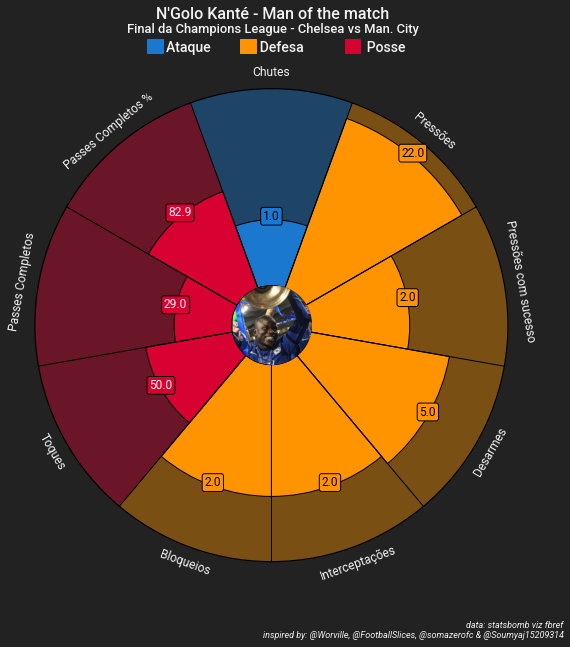

In [6]:
# color for the slices and text
slice_colors = ["#1A78CF"] * 1 + ["#FF9300"] * 5 + ["#D70232"] * 3
text_colors = ["#000000"] * 6 + ["#F2F2F2"] * 3

# instantiate PyPizza class
baker = PyPizza(
    params=params_br,                  # list of parameters
    min_range=min_range,            # min range values
    max_range=max_range,            # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0, other_circle_color="#000000", inner_circle_size=20
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8.5, 9),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=12, zorder=5,
        fontproperties=font_normal.prop, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                           # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, "N'Golo Kanté - Man of the match", size=16,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "Final da Champions League - Chelsea vs Man. City",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#F2F2F2",
    ha="right"
)

# add text
fig.text(
    0.34, 0.925, "Ataque              Defesa                  Posse       ", size=14,
    fontproperties=font_bold.prop, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    foto, fig, left=0.4478, bottom=0.4385, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()